Project 3-3

In [1]:
using Images, TestImages, ImageView, LinearAlgebra, ImageMagick

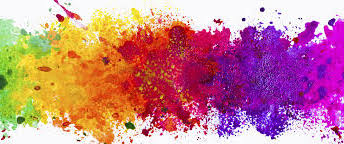

In [2]:
img=load("colors.jpg")


In [3]:
A=channelview(img)

R=A[1,:,:]
G=A[2,:,:]
B=A[3,:,:]

n,m=size(R)
O=ones(n,m)
R2=255*R-127*O
G2=255*G-127*O
B2=255*B-127*O

Y=.299*R2+.587*G2+.114*B2
U=B2-Y
V=R2-Y


144×344 Array{Float64,2}:
 -0.228   -0.228   -0.228   -0.228  …   -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228  …   -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228      -0.228   -0.228   -0.228   -0.228
 -0.228   -0.228   -0.228   -0.228       0.587    0.473    0.131    0.131
 -0.228   -0.228   -0.228   -0.228       1.305   -0.228   -2.69    -3.75
 -0.228   -0.228   -0.228   -0.228  …    0.832   -1.288   -4.109   -3.995
 -0.228   -0.228   -0.228   -0.228      -2.821   -1.06     0.0      1.06
 -0.228   -0.228   -0.228   -0.228      -7.175   -1.06     2.348    4.109
  ⋮           

In [8]:
function cbf(n,k,t)
  if k==0
    return 1/sqrt(n)
  else
    return sqrt(2/n)*cos(k*(2t+1)*pi/(2n))
  end
end
  
s=1
lumin=s*[16 11 10 16 24 40 51 61; 12 12 14 19 26 58 60 55; 14 13 16 24 40 57 69 56; 14 17 22 29 51 87 80 62; 18 22 37 56 68 109 103 77; 24 35 55 64 81 104 113 92; 49 64 78 87 103 121 120 101; 72 92 95 98 112 100 103 99]

function luminQ(B)
  m,n=size(B)
  a=Int(floor(m/8))
  b=Int(floor(n/8))
  
  C=[cbf(8,i,j) for i=0:7, j=0:7]
  
  M=zeros(m,n)
  for i=1:a, j=1:b
    rows=(8i-7):8i
    cols=(8j-7):8j
    X=B[rows,cols]
    Y=C*X*C'  
    Y2=round.(Y./lumin)
    Y3=Y2.*lumin  
    X2=C'*Y3*C
    M[rows,cols]=X2
  end
  return M  
end
  
chrome=s*[17 18 24 47 99 99 99 99; 18 21 26 66 99 99 99 99; 24 26 56 99 99 99 99 99; 47 66 99 99 99 99 99 99; 99 99 99 99 99 99 99 99; 99 99 99 99 99 99 99 99; 99 99 99 99 99 99 99 99; 99 99 99 99 99 99 99 99]
  
function chromeQ(B)
  m,n=size(B)
  a=Int(floor(m/8))
  b=Int(floor(n/8))
  
  C=[cbf(8,i,j) for i=0:7, j=0:7]
  
  M=zeros(m,n)
  for i=1:a, j=1:b
    rows=(8i-7):8i
    cols=(8j-7):8j
    X=B[rows,cols]
    Y=C*X*C'
    Y2=round.(Y./chrome)
    Y3=Y2.*chrome
    X2=C'*Y3*C
    M[rows,cols]=X2
  end
  return M
end


chromeQ (generic function with 1 method)

In [9]:
Y2=luminQ(Y)
U2=chromeQ(U)
V2=chromeQ(V)

B3=U2+Y2
R3=V2+Y2
G3=(Y2-0.299*R3-0.114*B3)/0.587

R4=(R3+127*O)/255
G4=(G3+127*O)/255
B4=(B3+127*O)/255

D=zeros(3,144,344)

D[1,:,:]=R4
D[2,:,:]=G4
D[3,:,:]=B4



144×344 Array{Float64,2}:
 0.992647  0.992647  0.992647   0.992647    …  0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647    …  0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       0.992647  0.992647  0.992647
 0.992647  0.992647  0.992647   0.992647       1.00092   0.97593   0.953975
 0.992647  0.992647  0.992647   0.992647       0.96321   0.966782  0.967517
 0.992647  0.992647  0.992647   0.992647    …  0.949317  0.944249  0.943747
 0.992647  0.992647  0.992647   0.992647       0.970284  0.960469  0.957524
 0.992647  0.992647  0.992647   0.992647       0.965471  0.998

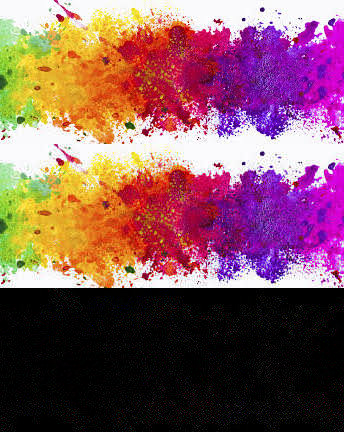

In [10]:
resultImg = colorview(RGB,D)
difference = A-D
differenceImg = colorview(RGB,difference)
mosaicview(img,resultImg,differenceImg,rnum=1)
